# Project: WeRateDogs - Data Wrangling Project

## Summary
This project is primarily focused on the practice of data wrangling. Data gathering, assessing, and cleaning are performed in various ways. Then, a quick data analysis will be followed where three insights are obtained along with the visualization.

## Introduction
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

## Table of Contents
<ul>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing </a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#analysis">Analyzing and Visualizing </a></li>
</ul>

<a id='gather'></a>
## Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.  
  
**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [1]:
# import necessary packages and the twitter archive file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_arch = pd.read_csv("twitter-archive-enhanced.csv")

**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [2]:
# import the image prediction file
import requests
import os

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
# access the content and write to a file
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
# export to the dataframe
df_img_pred = pd.read_csv("image-predictions.tsv", sep='\t')

**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [6]:
# Access Twitter API with tweepy
import tweepy

# authentication
consumer_key = 'key input'
consumer_secret = 'key input'
access_token = 'key input'
access_secret = 'key input'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# create api object
api = tweepy.API(auth)

In [7]:
# get tweet JSON data via tweet ID
tweet = []

# check run time
import time
start = time.time()

for i in df_arch['tweet_id']:
    try:
        tweet.append(api.get_status(i, tweet_mode='extended'))
    except:
        pass
end = time.time()
print(end - start)

920.8152973651886


In [8]:
# extract json data of each id into a .txt file
import json

with open('tweet_json.txt', 'w') as file:
    for i in range(len(tweet)):
        file.write(json.dumps(tweet[i]._json))
        file.write('\n')

In [9]:
# export to the dataframe
df_add_twit = pd.read_json('tweet_json.txt', lines=True)

In [10]:
df_add_twit

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
920,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
921,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
922,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


<a id='assess'></a>
## Assessing 
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### df_arch

In [11]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# see retweets where retweeted_status_id is not null
df_arch[~df_arch['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [14]:
# see reply tweets where in_reply_to_status_id is not null
df_arch[~df_arch['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [15]:
df_arch['tweet_id'].nunique()

2356

In [16]:
df_arch['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [17]:
df_arch[df_arch['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


### df_img_pred

In [18]:
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# see the distribution of p1_confidence when p1_dog = True
df_img_pred.query('p1_dog == True')['p1_conf'].describe()

count    1532.000000
mean        0.613823
std         0.259735
min         0.044333
25%         0.390981
50%         0.614025
75%         0.850559
max         0.999956
Name: p1_conf, dtype: float64

In [21]:
# see what breeds are predicted
df_img_pred.query('p1_dog == True').p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

### df_add_twit

In [22]:
df_add_twit.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [23]:
df_add_twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     924 non-null    datetime64[ns, UTC]
 1   id                             924 non-null    int64              
 2   id_str                         924 non-null    int64              
 3   full_text                      924 non-null    object             
 4   truncated                      924 non-null    bool               
 5   display_text_range             924 non-null    object             
 6   entities                       924 non-null    object             
 7   extended_entities              769 non-null    object             
 8   source                         924 non-null    object             
 9   in_reply_to_status_id          32 non-null     float64            
 10  in_reply_to_status_id_str 

### Quality issues
#### df_arch
1. The data type of tweet_id should be string instead of integer/float  

2. Since 181 tweets are retweets and not original (retweeted_status_id is not null), they should be removed  

3. Since 78 tweets are replies and not original (in_reply_to_status_id is not null), they should be removed  

4. 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', and 'name' columns are unnecessary and can be removed  

5. Due to the denominators other than 10, a ratio column (numerator / denominoator) would be necessary to properly assess the ratings  

#### df_img_pred
6. The data type of tweet_id should be string instead of integer/float  

#### df_add_twit
7. Except for id, retweet_count, and favorite_count, other columns are unnecessary  
8. The column title 'id' is not consistent with other dataframes' 'tweet_id' so it needs to be changed  
9. The data type of tweet_id should be string instead of integer/float   

### Tidiness issues
10. For df_arch, the stages of dog should be shown in one column instead of having four columns (doggo, floofer, pupper, and puppo)  
11. "retweet_count" and "favorite_count" information in df_add_twit should be merged into df_arch so that tweet archive data have all information including their retweet and favorite counts in one dataframe  
12. Dog breed prediction data should be merged into df_arch so that tweet archive data have all information including dogs' predicted breeds in one dataframe

<a id='clean'></a>
## Cleaning
In this section, clean **all** of the issues you documented while assessing. 

In [24]:
# Make copies of original pieces of data
df_arch_clean = df_arch.copy()
df_img_pred_clean = df_img_pred.copy()
df_add_twit_clean = df_add_twit.copy()

### Quality issues

### df_arch

### Issue #1: The data type of tweet_id should be string instead of integer/float

#### Define: Change the data type of tweet_id column using astype

#### Code

In [25]:
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype(str)

#### Test

In [26]:
df_arch_clean['tweet_id'].dtypes

dtype('O')

### Issue #2: Since 181 tweets are retweets and not original (retweeted_status_id is not null), they should be removed

#### Define: Remove 181 rows that have non-null retweeted_status_id

#### Code

In [27]:
df_arch_clean = df_arch_clean[df_arch_clean['retweeted_status_id'].isnull()].reset_index(drop=True)

#### Test

In [28]:
df_arch_clean['retweeted_status_id'].isnull().mean()

1.0

### Issue #3: Since 78 tweets are replies and not original (in_reply_to_status_id is not null), they should be removed

#### Define: Remove the rows that have non-null in_reply_to_status_id

#### Code

In [29]:
df_arch_clean = df_arch_clean[df_arch_clean['in_reply_to_status_id'].isnull()].reset_index(drop=True)

#### Test

In [30]:
df_arch_clean['in_reply_to_status_id'].isnull().mean()

1.0

### Issue #4: 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', and 'name' columns are unnecessary and can be removed

#### Define: Remove the 8 columns listed above

#### Code

In [31]:
df_arch_clean = df_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'name'])

#### Test

In [32]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   text                2097 non-null   object
 2   rating_numerator    2097 non-null   int64 
 3   rating_denominator  2097 non-null   int64 
 4   doggo               2097 non-null   object
 5   floofer             2097 non-null   object
 6   pupper              2097 non-null   object
 7   puppo               2097 non-null   object
dtypes: int64(2), object(6)
memory usage: 131.2+ KB


### Issue #5: Due to the denominators other than 10, a ratio column (numerator / denominoator) would be necessary to properly assess the ratings 

#### Define: Add 'rating_ratio' column (rating_numerator / rating_denominator) and delete 'rating_numerator' and 'rating_denominator' columns

#### Code

In [33]:
df_arch_clean['rating_ratio'] = df_arch_clean['rating_numerator'] / df_arch_clean['rating_denominator']
df_arch_clean = df_arch_clean.drop(columns=['rating_numerator', 'rating_denominator'])

#### Test

In [34]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2097 non-null   object 
 1   text          2097 non-null   object 
 2   doggo         2097 non-null   object 
 3   floofer       2097 non-null   object 
 4   pupper        2097 non-null   object 
 5   puppo         2097 non-null   object 
 6   rating_ratio  2097 non-null   float64
dtypes: float64(1), object(6)
memory usage: 114.8+ KB


### df_img_pred

### Issue #6: The data type of tweet_id should be string instead of integer/float

#### Define: Change the data type of tweet_id column using astype

#### Code

In [35]:
df_img_pred_clean['tweet_id'] = df_img_pred_clean['tweet_id'].astype(str)

#### Test

In [36]:
df_img_pred_clean.tweet_id.dtypes

dtype('O')

### df_add_twit

### Issue #7: Except for id, retweet_count, and favorite_count, other columns are unnecessary

#### Define: Remove the all columns except for 'id', 'retweet_count', and 'favorite_count'

#### Code

In [37]:
col_drop = list(set(df_add_twit_clean.columns.tolist()) - set(['id', 'retweet_count', 'favorite_count']))
df_add_twit_clean = df_add_twit_clean.drop(columns=col_drop)

#### Test

In [38]:
df_add_twit_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              924 non-null    int64
 1   retweet_count   924 non-null    int64
 2   favorite_count  924 non-null    int64
dtypes: int64(3)
memory usage: 21.8 KB


### Issue #8: The column title 'id' is not consistent with other dataframes' 'tweet_id' so it needs to be changed 

#### Define: Change the column name to 'tweet_id' from 'id' using rename method

#### Code

In [39]:
df_add_twit_clean = df_add_twit_clean.rename(columns={'id':'tweet_id'})

#### Test

In [40]:
df_add_twit_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        924 non-null    int64
 1   retweet_count   924 non-null    int64
 2   favorite_count  924 non-null    int64
dtypes: int64(3)
memory usage: 21.8 KB


### Issue #9: The data type of tweet_id should be string instead of integer/float 

#### Define: Change the data type of tweet_id column using astype

#### Code

In [41]:
df_add_twit_clean['tweet_id'] = df_add_twit_clean['tweet_id'].astype(str)

#### Test

In [42]:
df_add_twit_clean['tweet_id'].dtypes

dtype('O')

### Tidiness issues

### Issue #10: For df_arch, the stages of dog should be shown in one column instead of having four columns (doggo, floofer, pupper, and puppo)

#### Define: Create "stage" column for dogs' stages and remove "doggo", "floofer", "pupper", and "puppo" columns

#### Code

In [43]:
# add 'stage' column
df_arch_clean['stage'] = 'None'

In [44]:
# make the index lists for each stage
doggo_idx = df_arch_clean.loc[df_arch_clean['doggo'] == 'doggo'].index
floofer_idx = df_arch_clean.loc[df_arch_clean['floofer'] == 'floofer'].index
pupper_idx = df_arch_clean.loc[df_arch_clean['pupper'] == 'pupper'].index
puppo_idx = df_arch_clean.loc[df_arch_clean['puppo'] == 'puppo'].index

In [45]:
# check if there are multiple stages assigned for one row
seen = set()
repeated = set()
for l in [doggo_idx, floofer_idx, pupper_idx, puppo_idx]:
    for i in set(l):
        if i in seen:
            repeated.add(i)
        else:
            seen.add(i)

multi_stg_idx = list(repeated)

In [46]:
# make lists for unique stage
doggo_unique_idx = [i for i in doggo_idx if i not in multi_stg_idx]
floofer_unique_idx = [i for i in floofer_idx if i not in multi_stg_idx]
pupper_unique_idx = [i for i in pupper_idx if i not in multi_stg_idx]
puppo_unique_idx = [i for i in puppo_idx if i not in multi_stg_idx]

In [47]:
# assign unique stage to 'stage' column
df_arch_clean.loc[doggo_unique_idx,'stage'] = 'doggo'
df_arch_clean.loc[floofer_unique_idx,'stage'] = 'floofer'
df_arch_clean.loc[pupper_unique_idx,'stage'] = 'pupper'
df_arch_clean.loc[puppo_unique_idx,'stage'] = 'puppo'

In [48]:
df_arch_clean.loc[multi_stg_idx]

,tweet_id,text,doggo,floofer,pupper,puppo,rating_ratio,stage
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,doggo,None,pupper,None,1.2,None
161,854010172552949760,"At first I thought this was a shy doggo, but i...",doggo,floofer,None,None,1.1,None
897,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",doggo,None,pupper,None,1.2,None
358,817777686764523521,"This is Dido. She's playing the lead role in ""...",doggo,None,pupper,None,1.3,None
748,751583847268179968,Please stop sending it pictures that don't eve...,doggo,None,pupper,None,0.5,None
848,741067306818797568,This is just downright precious af. 12/10 for ...,doggo,None,pupper,None,1.2,None
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo,None,pupper,None,1.2,None
562,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",doggo,None,pupper,None,1.2,None
536,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,doggo,None,pupper,None,1.0,None
154,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggo,None,None,puppo,1.3,None


In [49]:
# assign the multi stages for the 11 rows
multi_stgs = ['doggo, pupper', 'doggo, floofer', 'doggo, pupper', 'doggo, pupper', 'doggo, pupper', 'doggo, pupper',
            'doggo, pupper', 'doggo, pupper', 'doggo, pupper', 'doggo, puppo', 'doggo, pupper']

df_arch_clean.loc[multi_stg_idx, 'stage']= multi_stgs

In [50]:
# delete the columns ('doggo', 'floofer', 'pupper', 'puppo')
df_arch_clean = df_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [51]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2097 non-null   object 
 1   text          2097 non-null   object 
 2   rating_ratio  2097 non-null   float64
 3   stage         2097 non-null   object 
dtypes: float64(1), object(3)
memory usage: 65.7+ KB


In [52]:
df_arch_clean.stage.value_counts()

None              1761
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Issue #11: "retweet_count" and "favorite_count" information in df_add_twit should be merged into df_arch so that tweet archive data have all information including their retweet and favorite counts in one dataframe

#### Define: Using pandas 'merge' method, merge df_add_twit_clean into df_arch_clean

#### Code

In [53]:
df_arch_clean = pd.merge(df_arch_clean, df_add_twit_clean, how='left', on='tweet_id')

#### Test

In [54]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2097 non-null   object 
 1   text            2097 non-null   object 
 2   rating_ratio    2097 non-null   float64
 3   stage           2097 non-null   object 
 4   retweet_count   744 non-null    float64
 5   favorite_count  744 non-null    float64
dtypes: float64(3), object(3)
memory usage: 114.7+ KB


### Issue #12: Dog breed prediction data should be merged into df_arch so that tweet archive data have all information including dogs' predicted breeds in one dataframe

#### Define: Using pandas 'merge' method, merge df_img_pred_clean into df_arch_clean. Merge only p1, p1_conf, and p1_dog columns

#### Code

In [55]:
# merge df_img_pred_clean to df_arch_clean
df_arch_clean = pd.merge(df_arch_clean, df_img_pred_clean[['tweet_id','p1','p1_conf', 'p1_dog']], how='left', on='tweet_id')

#### Test

In [56]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2097 non-null   object 
 1   text            2097 non-null   object 
 2   rating_ratio    2097 non-null   float64
 3   stage           2097 non-null   object 
 4   retweet_count   744 non-null    float64
 5   favorite_count  744 non-null    float64
 6   p1              1971 non-null   object 
 7   p1_conf         1971 non-null   float64
 8   p1_dog          1971 non-null   object 
dtypes: float64(4), object(5)
memory usage: 163.8+ KB


In [57]:
df_arch_clean.p1_conf.describe()

count    1971.000000
mean        0.594558
std         0.272126
min         0.044333
25%         0.363091
50%         0.587764
75%         0.847827
max         1.000000
Name: p1_conf, dtype: float64

### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
df_arch_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analyzing and Visualizing 
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Dog stages tweeted

How many each dog stage is tweeted will be shown.

In [59]:
# see what dog stages and how many of them are tweeted
df_arch_clean.stage.value_counts()

None              1761
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [60]:
# make a list for four stages
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

# make a list for counts of each stage (doggo, floofer, pupper, and puppo)
dog_stage_count = df_arch_clean.stage.value_counts().loc[['doggo','floofer', 'pupper', 'puppo']]

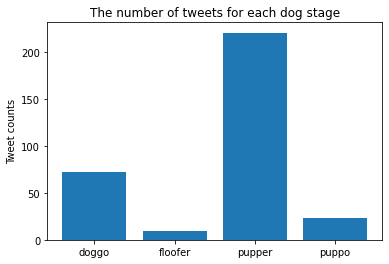

In [61]:
# make a bar plot
plt.bar(dog_stage, dog_stage_count);
plt.ylabel('Tweet counts')
plt.title('The number of tweets for each dog stage');

The dog stages are not specified in most of the tweets (1761 out of 2097). Some of them are tweeted with multiple stages (e.g. "doggo, pupper"). Among uniquely mentioned dog stages (325 out of 2097), pupper are tweeted the most, followed by doggo, puppo, and floofer.

### Dog breeds and their ratings

Only reliable prediction for dog breeds is used for the following analyses where p1_dog=True and p1_conf > 0.75.

In [62]:
# see the number of each breed tweeted among the reliable prediction
df_arch_clean.query('p1_dog == True and p1_conf > 0.75').p1.value_counts()

golden_retriever      78
Pembroke              47
Labrador_retriever    40
pug                   34
Chihuahua             25
                      ..
briard                 1
giant_schnauzer        1
malinois               1
kelpie                 1
Ibizan_hound           1
Name: p1, Length: 79, dtype: int64

The top 5 breeds tweeted will be taken and the distributions among them will be studied. Again, the predicted breed data was extracted from the image prediction file only with the #1 prediction of dog breeds and a confidence of 75% or above.

In [63]:
# extract the top 5 breeds tweeted from the dataframe
top_5_breed = df_arch_clean.query('p1_dog == True and p1_conf > 0.75').p1.value_counts().index.to_list()[0:5]
top_5_breed

['golden_retriever', 'Pembroke', 'Labrador_retriever', 'pug', 'Chihuahua']

In [64]:
# make lists for the rating scores for all top 5 breeds

gol_rating = df_arch_clean.query('p1_dog == True and p1_conf > 0.75 and p1 == "golden_retriever"')['rating_ratio'].to_list()
pem_rating = df_arch_clean.query('p1_dog == True and p1_conf > 0.75 and p1 == "Pembroke"')['rating_ratio'].to_list()
lab_rating = df_arch_clean.query('p1_dog == True and p1_conf > 0.75 and p1 == "Labrador_retriever"')['rating_ratio'].to_list()
pug_rating = df_arch_clean.query('p1_dog == True and p1_conf > 0.75 and p1 == "pug"')['rating_ratio'].to_list()
chi_rating = df_arch_clean.query('p1_dog == True and p1_conf > 0.75 and p1 == "Chihuahua"')['rating_ratio'].to_list()

In [65]:
# make a dictionary for top 5 breed: their ratings
top_5_rating = {top_5_breed[0]:gol_rating, top_5_breed[1]:pem_rating, top_5_breed[2]:lab_rating,
                top_5_breed[3]:pug_rating, top_5_breed[4]:chi_rating}

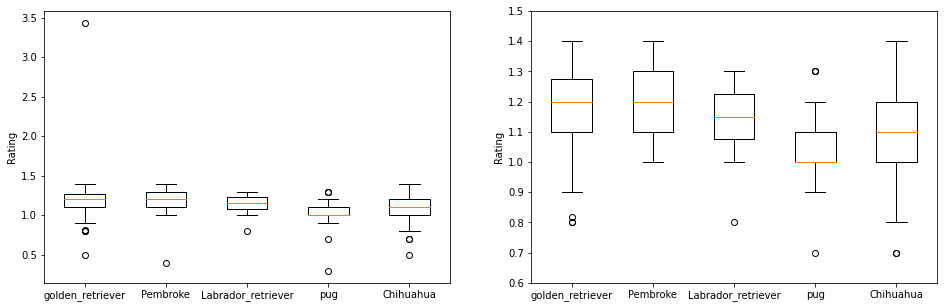

In [66]:
# make two boxplots (one with the full distribution + one without outliers)
labels, data = top_5_rating.keys(), top_5_rating.values()

plt.figure(figsize = [16, 5])

# left plot: full distribution
plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.ylabel('Rating')

# right plot: distribution without outliers
plt.subplot(1, 2, 2)
plt.boxplot(data)
plt.ylim(0.6, 1.5)
plt.ylabel('Rating')
plt.xticks(range(1, len(labels) + 1), labels);

For the top 5 breeds tweeted, most of the scores they received are above 1.0 in ratio. Pug was the breed that received the lowest median score among the top 5 while its distribution is very much right-skewed.

### Favorite counts and dog breeds

In [67]:
# see the distribution of the favorite counts
df_arch_clean.favorite_count.describe()

count       744.000000
mean      15083.299731
std       13516.947830
min          66.000000
25%        7178.500000
50%       11395.000000
75%       19603.250000
max      123367.000000
Name: favorite_count, dtype: float64

In [68]:
# take the tweets that received more than 8847 favorites
fav_tweet = df_arch_clean.query('favorite_count > 8847')
len(fav_tweet)

480

What dog breeds are the largest numbers in favorite tweets will be studied.

In [69]:
# make a series for the top 10 breeds in favorite counts
top_10_fav_breed = fav_tweet.query('p1_dog == True and p1_conf > 0.75')['p1'].value_counts()[:10]

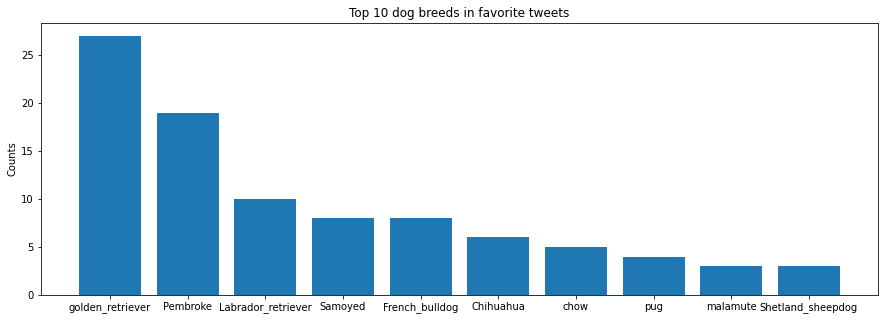

In [70]:
# make a histogram
plt.figure(figsize=(15,5))
plt.bar(x=top_10_fav_breed.index, height=top_10_fav_breed)
plt.ylabel('Counts')
plt.title('Top 10 dog breeds in favorite tweets');

In 485 favorite tweets, golden retriever accounts for the largest number, followed by pembroke, labrador retriever, and so on.

### Insights:
1. Among uniquely mentioned dog stages (325 out of 2097), pupper are tweeted the most, followed by doggo, puppo, and floofer.  

2. For the top 5 breeds tweeted, most of the scores they received are above 1.0 in ratio. Pug was the breed that received the lowest median score among the top 5 while its distribution is very much right-skewed.  

3. A golden retriever is the dog breed that accounts for the largest numbers in favorite tweets, followed by Pembroke, labrador retriever, and so on.